In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./data/raw_train.csv')
test = pd.read_csv('./data/raw_test.csv')
train.shape, test.shape

((520, 9), (281, 8))

In [3]:
brk = train.shape[0]
comb = pd.concat([train, test], axis=0, sort=False, ignore_index=True)
comb.shape

(801, 9)

In [4]:
comb.iloc[brk-2:brk+2,:]

,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,is_legendary
518,519,69,"normal, nan","['Own Tempo', 'Tangled Feet', 'Contrary']",70,1.1,5,"60, nan, 60.0, 60.0, 60.0, 60.0",0.0
519,520,461,"dragon, flying","['Inner Focus', 'Multiscale']",35,2.2,210,"nan, 134.0, 95.0, 100.0, 100.0, 80.0",0.0
520,1,602,"grass, nan","['Overgrow', 'Contrary']",70.0,0.6,8.1,"nan, nan, 55.0, 45.0, nan, 63.0",NaN
521,2,756,"fairy, flying","['Hustle', 'Serene Grace', 'Super Luck']",70.0,1.5,38.0,"nan, nan, 95.0, 120.0, 115.0, 80.0",NaN


In [5]:
comb.drop(columns=['rowid'], inplace=True)

In [6]:
comb.sample(10)

,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,is_legendary
632,567,"poison, flying","['Inner Focus', 'Infiltrator']",70.0,1.6,55.0,"nan, nan, 70.0, 65.0, nan, 90.0",NaN
235,3,"bug, fighting",['Beast Boost'],0,1.8,25,"nan, 137.0, 37.0, 137.0, 37.0, 151.0",1.0
334,778,"electric, flying","['Prankster', 'Defiant', 'Volt Absorb']",90,1.5,61,"nan, nan, 70.0, 145.0, 80.0, 101.0",1.0
360,589,"dark, dragon",['Levitate'],35,1.8,160,"nan, 105.0, 90.0, 125.0, 90.0, 98.0",0.0
439,774,"normal, nan","['Immunity', 'Thick Fat', 'Gluttony']",70,2.1,460,"nan, 110.0, 65.0, 65.0, 110.0, 30.0",0.0
251,342,"grass, nan","['Chlorophyll', 'Solar Power', 'Early Bird']",70,0.8,8.5,"nan, 75.0, 55.0, 105.0, nan, 30.0",0.0
314,164,"ground, nan","['Sand Stream', 'Sand Force']",70,0.8,49.5,"nan, 72.0, 78.0, 38.0, 42.0, 32.0",0.0
567,489,"psychic, nan","['Frisk', 'Competitive', 'Shadow Tag']",70.0,0.4,5.8,"45, 30.0, 50.0, 55.0, 65.0, 45.0",NaN
730,552,"water, nan","['Poison Point', 'Sniper', 'Damp']",70.0,1.2,25.0,"55, 65.0, 95.0, nan, 45.0, 85.0",NaN
418,646,"water, nan","['Swift Swim', 'Hydration']",70,0.6,8.7,"nan, nan, nan, 40.0, nan, 97.0",0.0


# Feature extraction

## Types

In [7]:
unique_type_comb = list(comb['types'].unique())
unique_types = set()
for type_set in unique_type_comb:
    for t in type_set.split():
        unique_types.add(t.replace(',',''))

In [8]:
unique_types

{'bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'nan',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water'}

In [9]:
for t in unique_types:
    comb['type_'+t] = comb['types'].apply(lambda x: 1 if t in x else 0)
comb.drop(columns=['types', 'type_nan'], inplace=True)

## Abilities

In [10]:
unique_abilities_comb = list(comb['abilities'].unique())
unique_abilities = set()
for abil_set in unique_abilities_comb:
    abils = abil_set.replace('[', '').replace(']', '').replace("'", '')
#     print(abils)
    for t in abils.split(','):
#         print(t.strip())
        unique_abilities.add(t.strip().replace(' ', '_'))

In [11]:
len(unique_abilities)

227

In [12]:
unique_abilities

{'Adaptability',
 'Aftermath',
 'Air_Lock',
 'Analytic',
 'Anger_Point',
 'Anticipation',
 'Arena_Trap',
 'Aroma_Veil',
 'Aura_Break',
 'Bad_Dreams',
 'Battery',
 'Battle_Armor',
 'Battle_Bond',
 'Beast_Boost',
 'Berserk',
 'Big_Pecks',
 'Blaze',
 'Bulletproof',
 'Cheek_Pouch',
 'Chlorophyll',
 'Clear_Body',
 'Cloud_Nine',
 'Color_Change',
 'Comatose',
 'Competitive',
 'Compoundeyes',
 'Contrary',
 'Corrosion',
 'Cursed_Body',
 'Cute_Charm',
 'Damp',
 'Dancer',
 'Dark_Aura',
 'Dazzling',
 'Defeatist',
 'Defiant',
 'Disguise',
 'Download',
 'Drizzle',
 'Drought',
 'Dry_Skin',
 'Early_Bird',
 'Effect_Spore',
 'Electric_Surge',
 'Emergency_Exit',
 'Fairy_Aura',
 'Filter',
 'Flame_Body',
 'Flare_Boost',
 'Flash_Fire',
 'Flower_Gift',
 'Flower_Veil',
 'Fluffy',
 'Forecast',
 'Forewarn',
 'Friend_Guard',
 'Frisk',
 'Full_Metal_Body',
 'Fur_Coat',
 'Gale_Wings',
 'Galvanize',
 'Gluttony',
 'Gooey',
 'Grass_Pelt',
 'Grassy_Surge',
 'Guts',
 'Harvest',
 'Healer',
 'Heatproof',
 'Heavy_Metal',
 

In [13]:
for t in unique_abilities:
    comb['abil_'+t] = comb['abilities'].apply(lambda x: 1 if t in x else 0)
comb.drop(columns=['abilities'], inplace=True)

In [14]:
comb.head(5)

,unique_id,base_happiness,height_m,weight_kg,poke_stats,is_legendary,type_ice,type_steel,type_poison,type_grass,...,abil_Contrary,abil_Rattled,abil_Corrosion,abil_Wonder_Skin,abil_Shields_Down,abil_Solar_Power,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling
0,665,70,0.6,12.5,"nan, 80.0, 55.0, 25.0, 35.0, 35.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,288,70,0.6,29.7,"nan, nan, 65.0, 45.0, 45.0, 45.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,349,70,1.2,22.2,"nan, 64.0, 60.0, 111.0, 60.0, 117.0",0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,260,70,0.4,6.5,"nan, 50.0, 95.0, 40.0, 50.0, 35.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,536,70,0.6,9.5,"nan, 65.0, 64.0, 44.0, 48.0, 43.0",0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Stats

In [15]:
def stat_extrator(stat: str, ix: int):
    s = stat.split(',')
    return s[ix]

# comb['stat_1'] = comb['poke_stats'].apply(lambda x: stat_extrator(x, 0)).astype(float)
# comb['stat_2'] = comb['poke_stats'].apply(lambda x: stat_extrator(x, 1)).astype(float)
# comb['stat_3'] = comb['poke_stats'].apply(lambda x: stat_extrator(x, 2)).astype(float)
# comb['stat_4'] = comb['poke_stats'].apply(lambda x: stat_extrator(x, 3)).astype(float)
# comb['stat_5'] = comb['poke_stats'].apply(lambda x: stat_extrator(x, 4)).astype(float)
# comb['stat_6'] = comb['poke_stats'].apply(lambda x: stat_extrator(x, 5)).astype(float)

In [16]:
for stat_n in range(0, 6, 1):
    col_name = 'stat_'+str(stat_n+1)
    comb[col_name] = comb['poke_stats'].apply(lambda x: stat_extrator(x, stat_n)).astype(float)
    comb[col_name].fillna(0, inplace=True)
#     print(stat_n)

comb.drop(columns=['poke_stats'], inplace=True)

In [17]:
comb.head(5)

,unique_id,base_happiness,height_m,weight_kg,is_legendary,type_ice,type_steel,type_poison,type_grass,type_ghost,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
0,665,70,0.6,12.5,0.0,0,0,0,0,0,...,0,0,0,0,0.0,80.0,55.0,25.0,35.0,35.0
1,288,70,0.6,29.7,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,65.0,45.0,45.0,45.0
2,349,70,1.2,22.2,0.0,0,0,1,0,0,...,0,0,0,0,0.0,64.0,60.0,111.0,60.0,117.0
3,260,70,0.4,6.5,0.0,0,0,0,0,0,...,0,0,0,0,0.0,50.0,95.0,40.0,50.0,35.0
4,536,70,0.6,9.5,0.0,0,0,0,0,0,...,0,0,0,0,0.0,65.0,64.0,44.0,48.0,43.0


# Other missing data

In [18]:
def summary_missing_data(df: pd.DataFrame, lowest_proportion: float = 0.0) -> pd.DataFrame:
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
    return missing_data[missing_data['Percent'] > lowest_proportion]

In [19]:
summary_missing_data(comb)

,Count,Percent
is_legendary,281,0.350811
base_happiness,83,0.103620
height_m,20,0.024969
weight_kg,19,0.023720


### Base_happiness

<img src='./base_happ_info.png'>
<img src='./base_happ_info2.png'>

### Base happiness doesn't seem to be relevant for a pokemon to be legendary or not

In [40]:
comb.drop(columns=['base_happiness'], inplace=True)

In [20]:
# comb['base_happiness'].unique()

array([70.0, 0.0, 35.0, 100.0, nan, 140.0, 90.0, '70.0', '35.0', '140.0',
       '100.0', '0.0', 'michael was here', '90.0'], dtype=object)

In [21]:
# comb[comb['base_happiness'] == 'michael was here']

,unique_id,base_happiness,height_m,weight_kg,is_legendary,type_ice,type_steel,type_poison,type_grass,type_ghost,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
619,353,michael was here,1.2,36.0,NaN,0,0,0,0,0,...,0,0,0,0,0.0,65.0,65.0,40.0,40.0,15.0


In [22]:
# comb.at[619, 'base_happiness'] = np.nan

In [39]:
# comb['base_happiness'] = comb['base_happiness'].astype(float);

In [38]:
# See frequency of happiness grouped by legendary/normal pokemons
# comb[ comb['is_legendary'] == 1.0 ]['base_happiness'].hist(label='Legenday')
# comb[ comb['is_legendary'] == 0.0 ]['base_happiness'].hist(label='Normal')
# plt.legend();

In [36]:
# Get NULL happiness who are legendary
# comb[ (comb['base_happiness'].isna()) & (comb['is_legendary']==1.0)]

In [34]:
# Get NULL happiness from the test set
# comb[ (comb['base_happiness'].isna()) & (comb['is_legendary'].isna())]

In [41]:
summary_missing_data(comb)

,Count,Percent
is_legendary,281,0.350811
height_m,20,0.024969
weight_kg,19,0.023720


## Height

In [110]:
comb['height_m'] = comb['height_m'].astype(float)

ValueError: could not convert string to float: 

In [42]:
comb[ comb['height_m'].isna() ]

,unique_id,height_m,weight_kg,is_legendary,type_ice,type_steel,type_poison,type_grass,type_ghost,type_water,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
25,246,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,130.0,55.0,0.0,45.0
36,71,NaN,NaN,0.0,1,0,0,0,0,0,...,0,0,0,0,0.0,75.0,90.0,10.0,35.0,40.0
63,450,NaN,NaN,0.0,0,0,1,0,0,0,...,0,0,0,0,0.0,105.0,75.0,65.0,0.0,50.0
66,470,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,100.0,60.0,50.0,70.0,110.0
86,456,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,65.0,60.0,60.0,0.0,65.0,115.0
90,100,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,85.0,50.0,95.0,85.0,110.0
210,220,NaN,NaN,0.0,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,75.0,81.0,0.0,109.0
221,481,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,115.0,75.0,55.0,75.0,82.0
232,398,NaN,NaN,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,30.0,35.0,45.0,90.0
274,638,NaN,NaN,0.0,0,0,1,0,0,0,...,0,0,0,0,0.0,80.0,50.0,40.0,50.0,25.0


In [117]:
comb['height_m'].unique()

array([0.6, 1.2, 0.4, 3.2, 1.1, 1.3, 0.5, 1.4, 2.1, 0.7, 0.2, 2.0, 2.3,
       3.5, nan, 1.7, 2.5, 1.8, 1.9, 0.9, 1.5, 0.3, 3.8, 1.0, 4.5, 0.8,
       0.1, 3.9, 2.4, 1.6, 5.8, 3.0, 2.2, 4.0, 5.4, 8.8, 5.2, 3.4, 3.3,
       6.5, 4.2, 3.7, 14.5, '0.6', '1.5', '1.4', '0.2', '1.3', '0.8',
       '1.9', '0.4', '1.0', '1.2', '1.6', '0.9', '0.3', '1.7', '9.2',
       '0.5', '0.7', '2.7', '2.8', '2.0', '1.8', '5.5', '1.1', '2.6',
       '0.1', '2.4', '2.3', ' ', '5.0', '2.5', '2.2', '3.5', '6.2', '2.1',
       '2.9', '3.0', '7.0'], dtype=object)

In [118]:
comb[ comb['height_m']==' ' ]

,unique_id,height_m,weight_kg,is_legendary,type_ice,type_steel,type_poison,type_grass,type_ghost,type_water,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
647,221,,71.0,NaN,0,0,0,1,1,0,...,0,0,0,0,0.0,110.0,76.0,65.0,82.0,56.0


In [124]:
comb.at[647, 'height_m'] = np.nan

In [125]:
comb['height_m'].unique()

array([0.6, 1.2, 0.4, 3.2, 1.1, 1.3, 0.5, 1.4, 2.1, 0.7, 0.2, 2.0, 2.3,
       3.5, nan, 1.7, 2.5, 1.8, 1.9, 0.9, 1.5, 0.3, 3.8, 1.0, 4.5, 0.8,
       0.1, 3.9, 2.4, 1.6, 5.8, 3.0, 2.2, 4.0, 5.4, 8.8, 5.2, 3.4, 3.3,
       6.5, 4.2, 3.7, 14.5, '0.6', '1.5', '1.4', '0.2', '1.3', '0.8',
       '1.9', '0.4', '1.0', '1.2', '1.6', '0.9', '0.3', '1.7', '9.2',
       '0.5', '0.7', '2.7', '2.8', '2.0', '1.8', '5.5', '1.1', '2.6',
       '0.1', '2.4', '2.3', '5.0', '2.5', '2.2', '3.5', '6.2', '2.1',
       '2.9', '3.0', '7.0'], dtype=object)

In [126]:
comb['height_m'] = comb['height_m'].astype(float)

In [127]:
comb.groupby(['is_legendary'])['height_m'].describe()

,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0.0,459.0,1.059259,0.975405,0.1,0.5,0.9,1.4,14.5
1.0,47.0,2.187234,1.467269,0.1,1.4,1.8,3.2,5.8


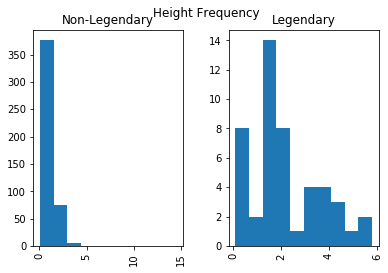

In [128]:
fig, axs = plt.subplots(1, 2)
comb.hist(column='height_m', by='is_legendary', figsize=(15,5), ax=axs);
fig.suptitle('Height Frequency');
axs[0].set_title('Non-Legendary');
axs[1].set_title('Legendary');

<h2 style='color:red'>Legendary pokemons are higher!</h2>

## Weight

In [130]:
comb['weight_kg'] = comb['weight_kg'].astype(float)

ValueError: could not convert string to float: 

In [144]:
comb['weight_kg'].unique()

array([12.5, 29.7, 22.2, 6.5, 9.5, 330.0, 15.3, 60.0, 10.5, 55.5, 27.0,
       220.0, 14.2, 0.3, 5.7, 20.5, 1.9, 11.8, 11.5, 150.5, 7.8, 88.8,
       3.4, 65.0, 3.5, nan, 35.0, 260.0, 59.6, 1.0, 21.0, 253.8, 20.3,
       15.5, 95.0, 5.0, 75.0, 100.0, 2.3, 340.0, 18.0, 51.5, 14.7, 50.5,
       3.2, 19.5, 5.9, 42.5, 5.4, 10.3, 23.6, 152.0, 29.0, 23.8, 62.0,
       175.0, 3.0, 32.8, 56.0, 202.5, 352.0, 0.6, 4.8, 125.8, 9.0, 53.0,
       34.3, 1.2, 19.6, 79.5, 108.0, 1.1, 9.9, 120.0, 26.6, 7.0, 11.0,
       1.5, 13.5, 15.0, 60.5, 16.3, 40.0, 31.0, 199.0, 39.2, 210.0, 21.5,
       6.6, 5.5, 15.8, 8.5, 230.0, 13.6, 136.0, 24.5, 10.4, 38.0, 55.0,
       39.0, 48.4, 85.6, 28.0, 17.3, 7.4, 29.8, 26.5, 2.5, 15.2, 85.2,
       203.0, 7.9, 6.4, 60.8, 34.5, 10.8, 25.0, 64.8, 23.0, 32.5, 11.6,
       37.5, 16.0, 31.5, 3.9, 6.0, 250.0, 185.0, 63.0, 26.0, 80.5, 25.5,
       48.7, 25.9, 18.6, 198.0, 81.1, 68.2, 20.6, 505.0, 19.0, 150.6,
       82.0, 36.0, 51.0, 130.5, 40.8, 58.0, 2.1, 71.2, 3.6, 46.8, 

In [145]:
comb[ comb['weight_kg']==' ' ]

,unique_id,height_m,weight_kg,is_legendary,type_ice,type_steel,type_poison,type_grass,type_ghost,type_water,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
535,74,0.8,,NaN,0,0,0,0,0,0,...,0,0,0,0,0.0,89.0,77.0,0.0,45.0,48.0
545,274,NaN,,NaN,1,0,0,0,0,0,...,0,0,0,0,0.0,41.0,40.0,50.0,65.0,65.0


In [146]:
comb.at[535, 'weight_kg'] = np.nan
comb.at[545, 'weight_kg'] = np.nan

In [147]:
comb['weight_kg'] = comb['weight_kg'].astype(float)

In [149]:
comb.groupby(['is_legendary'])['weight_kg'].describe()

,count,mean,std,min,25%,50%,75%,max
is_legendary,,,,,,,,
0.0,459.0,48.279956,78.176184,0.1,8.55,24.0,57.5,920.0
1.0,47.0,178.255319,204.855688,0.1,49.50,120.0,230.0,999.9


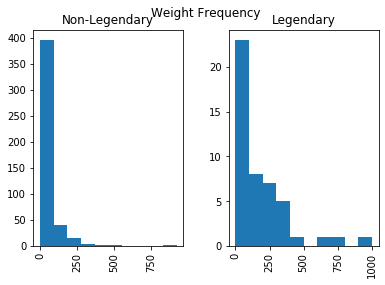

In [148]:
fig, axs = plt.subplots(1, 2)
comb.hist(column='weight_kg', by='is_legendary', figsize=(15,5), ax=axs);
fig.suptitle('Weight Frequency');
axs[0].set_title('Non-Legendary');
axs[1].set_title('Legendary');

<h2 style='color:red'>Legendary pokemons also weight more!</h2>

## Input missing values grouped by is_legendary

In [158]:
comb[ (comb['height_m'].isna()) & (comb['is_legendary']==1) ][['height_m', 'is_legendary']]

,height_m,is_legendary
437,NaN,1.0


In [163]:
comb.at[437, 'height_m'] = 2.187234
comb['height_m'].fillna(1.059259, inplace=True);

In [165]:
comb[ (comb['weight_kg'].isna()) & (comb['is_legendary']==1) ][['weight_kg', 'is_legendary']]

,weight_kg,is_legendary
437,NaN,1.0


In [166]:
comb.at[437, 'weight_kg'] = 178.255319
comb['weight_kg'].fillna(48.279956, inplace=True);

In [167]:
summary_missing_data(comb)

,Count,Percent
is_legendary,281,0.350811


# Split train/test data and save file

In [168]:
traindata = comb.iloc[:brk,:]
testdata = comb.iloc[brk:,:]
testdata.drop(columns=['is_legendary'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [169]:
traindata.tail()

,unique_id,height_m,weight_kg,is_legendary,type_ice,type_steel,type_poison,type_grass,type_ghost,type_water,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
515,123,0.6,3.2,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,80.0,105.0,40.0
516,690,1.4,40.6,0.0,1,0,0,0,0,0,...,0,0,0,0,0.0,50.0,35.0,115.0,95.0,95.0
517,147,1.4,50.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,70.0,65.0,70.0,58.0
518,69,1.1,5.0,0.0,0,0,0,0,0,0,...,0,0,0,0,60.0,0.0,60.0,60.0,60.0,60.0
519,461,2.2,210.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0.0,134.0,95.0,100.0,100.0,80.0


In [170]:
testdata.head()

,unique_id,height_m,weight_kg,type_ice,type_steel,type_poison,type_grass,type_ghost,type_water,type_psychic,...,abil_Flower_Gift,abil_Shadow_Tag,abil_Telepathy,abil_Dazzling,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6
520,602,0.6,8.1,0,0,0,1,0,0,0,...,0,0,0,0,0.0,0.0,55.0,45.0,0.0,63.0
521,756,1.5,38.0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,95.0,120.0,115.0,80.0
522,191,1.4,61.5,0,0,0,0,0,0,0,...,0,0,0,0,0.0,95.0,105.0,165.0,0.0,45.0
523,16,0.2,0.6,0,0,0,0,0,0,1,...,0,0,0,0,0.0,30.0,50.0,65.0,0.0,45.0
524,718,1.3,31.5,0,0,0,0,0,0,1,...,0,0,1,0,0.0,100.0,85.0,80.0,85.0,100.0


In [171]:
traindata.to_csv('./data/cl_train.csv', index=False)
testdata.to_csv('./data/cl_test.csv', index=False)